In [35]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import ndimage
from shapely.wkt import loads
import matplotlib.pylab as pylab
import warnings
import libpysal as ps
#warnings.filterwarnings("ignore")
#pylab.rcParams['figure.figsize'] = 13,7

# Step 1: Prepare Trat Map at Tambon level

## Step 1.1: Prepare base map

Observations, Attributes: (38, 15)
   Shape_Leng  Shape_Area    ADM3_EN             ADM3_TH ADM3_PCODE  \
0    0.080109    0.000193  Bang Phra  à¸à¸²à¸à¸à¸£à¸°   TH230101   

       ADM2_EN                      ADM2_TH ADM2_PCODE ADM1_EN       ADM1_TH  \
0  Mueang Trat  à¹à¸¡à¸·à¸­à¸à¸à¸£à¸²à¸     TH2301    Trat  à¸à¸£à¸²à¸   

  ADM1_PCODE   ADM0_EN                      ADM0_TH ADM0_PCODE  \
0       TH23  Thailand  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢         TH   

                                            geometry  
0  POLYGON ((102.52939 12.25266, 102.52936 12.252...  


<Axes: >

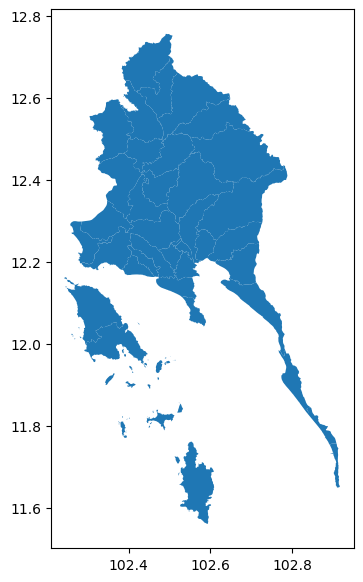

In [38]:
trat = gpd.GeoDataFrame.from_file("Map/Trat/Tambol/Trat.shx")
print("Observations, Attributes:", trat.shape)
print(trat.head(1))
trat.plot()

In [48]:
trat.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Shape_Leng       38 non-null     float64 
 1   Shape_Area       38 non-null     float64 
 2   ADM3_EN          38 non-null     object  
 3   ADM3_TH          38 non-null     object  
 4   ADM3_PCODE       38 non-null     object  
 5   ADM2_EN          38 non-null     object  
 6   ADM2_TH          38 non-null     object  
 7   ADM2_PCODE       38 non-null     object  
 8   ADM1_EN          38 non-null     object  
 9   ADM1_TH          38 non-null     object  
 10  ADM1_PCODE       38 non-null     object  
 11  ADM0_EN          38 non-null     object  
 12  ADM0_TH          38 non-null     object  
 13  ADM0_PCODE       38 non-null     object  
 14  geometry         38 non-null     geometry
 15  centroid_column  38 non-null     geometry
dtypes: float64(2), geometry(2), object(12)

## Step 1.2: Center of tambol

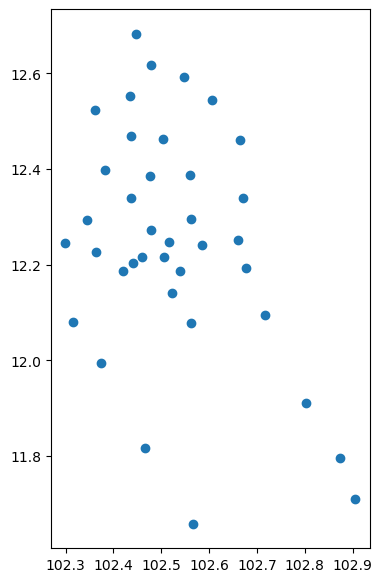

In [41]:
trat['centroid_column'] = trat.centroid
trat_center = trat.set_geometry('centroid_column')
trat_center.plot();

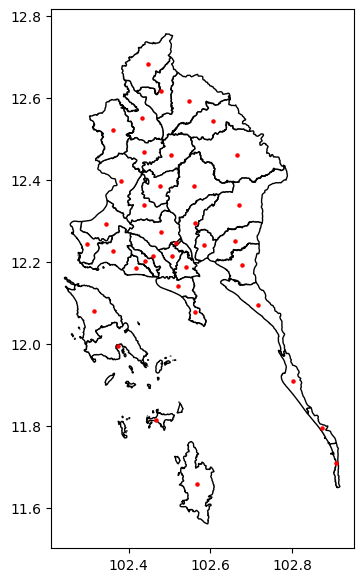

In [42]:
basemap = trat.plot(color='white', edgecolor='black')
trat_center.plot(ax=basemap, marker='o', color='red', markersize=5);
#cities.plot(ax=basemap, marker='o', color='red', markersize=5);

# Step 2: load population data

<Axes: >

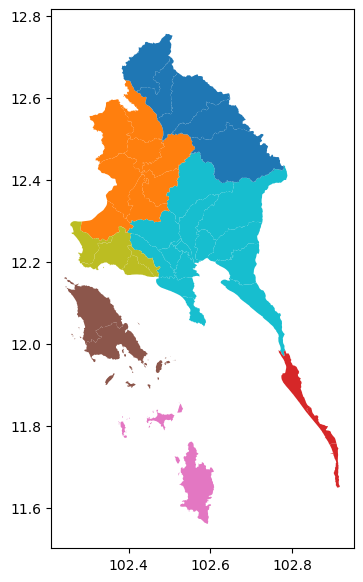

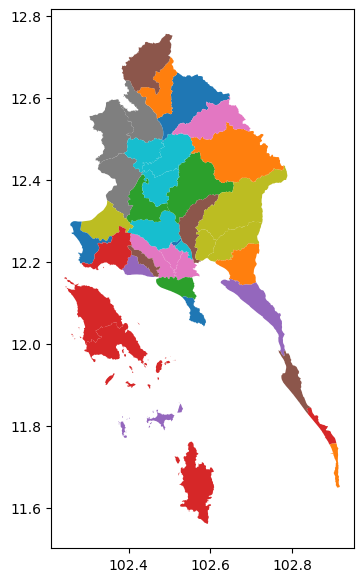

In [47]:
#2.1 Colorful map by Amphoe and district
trat.plot(column='ADM2_EN')
trat.plot(column='ADM3_EN')

<Axes: >

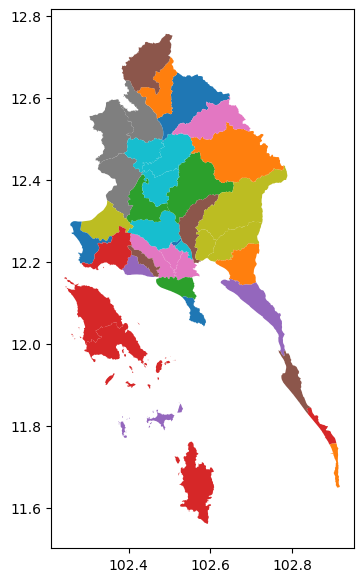

In [46]:
#2.1 Colorful map by Amphoe
trat.plot(column='ADM3_EN')